#**Importing libraries and reading data**

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/data.csv')

#**Quick view**

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
#number of rows in each column
df.count()

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [ ]:
#number of columns
print("-the number of columns is :",df.columns.size)
print("-the number of rows is :", len(df)) #df.shape[0]
print("-the data shape is :",df.shape)
print("-the total number of elements in the dataset is:",df.size)
print("-the columns name are ",df.columns)


-the number of columns is : 18
-the number of rows is : 4600
-the data shape is : (4600, 18)
-the total number of elements in the dataset is: 82800
-the columns name are  Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [ ]:
#getting the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
#datatypes
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

**we can conclude that there are no nulls but we need**

In [ ]:
#Data inspection
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [ ]:
#searching for the unique values
for i in df.columns:
  print(i ,":",df[i].unique())
  print("______________________________________")

date : ['2014-05-02 00:00:00' '2014-05-03 00:00:00' '2014-05-04 00:00:00'
 '2014-05-05 00:00:00' '2014-05-06 00:00:00' '2014-05-07 00:00:00'
 '2014-05-08 00:00:00' '2014-05-09 00:00:00' '2014-05-10 00:00:00'
 '2014-05-11 00:00:00' '2014-05-12 00:00:00' '2014-05-13 00:00:00'
 '2014-05-14 00:00:00' '2014-05-15 00:00:00' '2014-05-16 00:00:00'
 '2014-05-17 00:00:00' '2014-05-18 00:00:00' '2014-05-19 00:00:00'
 '2014-05-20 00:00:00' '2014-05-21 00:00:00' '2014-05-22 00:00:00'
 '2014-05-23 00:00:00' '2014-05-24 00:00:00' '2014-05-25 00:00:00'
 '2014-05-26 00:00:00' '2014-05-27 00:00:00' '2014-05-28 00:00:00'
 '2014-05-29 00:00:00' '2014-05-30 00:00:00' '2014-05-31 00:00:00'
 '2014-06-01 00:00:00' '2014-06-02 00:00:00' '2014-06-03 00:00:00'
 '2014-06-04 00:00:00' '2014-06-05 00:00:00' '2014-06-06 00:00:00'
 '2014-06-07 00:00:00' '2014-06-08 00:00:00' '2014-06-09 00:00:00'
 '2014-06-10 00:00:00' '2014-06-11 00:00:00' '2014-06-12 00:00:00'
 '2014-06-13 00:00:00' '2014-06-14 00:00:00' '2014-06-1

**we can conclude that in the country there is only the USA
, the date needs to be converted , the bedrooms ,floors,and the bathrooms are double they need to be integer , watrefront is binary evaluation(0,1) and there are no negative values .**

**we can describe the data after the overview**

* **date:**

    Type: datetime

    Description: The date when the house was sold.

* **price:**

    Type: float

    Description: The sale price of the house in dollars.

* **bedrooms:**

    Type: float

    Description: The number of bedrooms in the house.

* **bathrooms:**

    Type: float

    Description: The number of bathrooms in the house, including fractional bathrooms (e.g., 1.5 bathrooms means one full bathroom and one half bathroom).

* **sqft_living:**

    Type: int

    Description: The interior living space area in square feet.

* **sqft_lot:**

    Type: int

    Description: The area of the lot in square feet.

* **floors:**

    Type: float

    Description: The number of floors in the house.

* **waterfront:**

    Type: int

    Description: A binary indicator where 0 means the house does not have a waterfront and 1 means it does.

* **view:**

    Type: int

    Description: An index from 0 to 4 of how good the view of the property was.

* **condition:**

    Type: int

    Description: An index from 1 to 5 on the condition of the house, where 1 means poor condition and 5 means very good condition.

* **sqft_above:**

    Type: int

    Description: The square footage of the interior space above ground level.

* **sqft_basement:**

    Type: int

    Description: The square footage of the basement.

* **yr_built:**

    Type: int

    Description: The year the house was built.

* **yr_renovated:**

    Type: int

    Description: The year the house was last renovated. If the house has never been renovated, this field might be 0 or null.

* **street:**

    Type: string

    Description: The street address of the house.

* **city:**

    Type: string

    Description: The city where the house is located.

* **statezip:**

    Type: string

    Description: The state and zip code where the house is located.

* **country:**

    Type: string
    
    Description: The country where the house is located (e.g., USA).






In [ ]:
#splitting x and y
X = df.iloc[:,df.columns!=df.columns[1]] #all the columns except the target(price)
y = df.iloc[:,df.columns==df.columns[1]] #the target column (price)




#**Preprocessing**

##**Nulls**

In [ ]:
#checking nulls
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

**There are no null values**

##**Duplicates**

In [ ]:
#checking the duplicates
df.duplicated().sum()

0

**There are no duplicates**

##**Datatypes**

**now is the time for the dtypes as we said before the date needs to be converted , the bedrooms ,floors,and the bathrooms are double they need to be integer**

In [ ]:
#the datetime conversion
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df=df.drop('date',axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month,day
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5,2
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5,2
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5,2
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,9
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,9
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,9
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,10


In [ ]:
#bedrooms , bathrooms and floors
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [ ]:
#checking types after conversion
df.dtypes

price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
year               int32
month              int32
day                int32
dtype: object

##**Encoding**

**Okay then it's time for encoding!**





In [ ]:
df.select_dtypes(include='object')

,street,city,statezip,country
0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,709 W Blaine St,Seattle,WA 98119,USA
2,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,857 170th Pl NE,Bellevue,WA 98008,USA
4,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...
4595,501 N 143rd St,Seattle,WA 98133,USA
4596,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
dff=df[['city','country','statezip','street']]
for i in dff.columns :
  print(i ," COLUMN : ",dff[i].unique())
  print(dff[i].nunique())
  print("___________________________")

city  COLUMN :  ['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
44
___________________________
country  COLUMN :  ['USA']
1
___________________________
statezip  COLUMN :  ['WA 98133' 'WA 98119' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115'
 'WA 98038' 'WA 98045' 'WA 98155' 'WA 98105' 'WA 98074' 'WA 98106'
 'WA 98007' 'WA 98092' 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011'
 'WA 98125' 'WA 98003' 'WA 98136' 'WA 98033' 'WA 98029' 'WA 98117'
 'WA 98034' 'WA 98072' 'WA 98023' 'WA 98107' 'WA 98166' 'WA 9

**There are 4 columns that need encoding**

**the country column contains only one unique value so it can dropped**

**the street column contains the street name for each house they are 4525 they are almost unique there are very small duplicate streets and it will not be usefull for the model so we can drop it**

In [ ]:
#dropping the country column
df=df.drop('country',axis=1)

In [ ]:
#dropping the street name
df=df.drop('street',axis=1)

**Let's together discuss the encoding types**
* **1-Label encoding**

    Assigns a unique integer to each category
* **2-One-hot encoding**

    Creates binary columns for each category and assigns 1 to the corresponding category column
* **3-Ordinal encoding**

    Similar to label encoding but explicitly specifies an order for categories

* **4-Binary encoding**

    Converts categories into binary representation and uses multiple columns to represent the categories
* **5-Hashing encoding**

    Hashes categorical variables into numerical values
* **6-Target/mean encoding**

    Replaces categories with the average value of the target variable for that category
* **7-Frequency encoding**

    Replaces categories with their frequencies (counts) in the dataset
* **8-Feature hashing**

    Converts categorical variables into a numerical representation using hash functions

In [ ]:
#Encoding the state
label_encoder = LabelEncoder()
df['statezip'] = label_encoder.fit_transform(df['statezip'])
df['city'] = label_encoder.fit_transform(df['city'])

**Encoding is done.**

##**Outliers**

In [ ]:
#outliers percentage
outliers_percentage = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percentage_outliers = (len(outliers) / len(df)) * 100

    outliers_percentage[col] = percentage_outliers

# Print the percentage of outliers for each column
for col, percentage in outliers_percentage.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")

Percentage of outliers in price: 5.22%
Percentage of outliers in bedrooms: 2.57%
Percentage of outliers in bathrooms: 2.22%
Percentage of outliers in sqft_living: 2.80%
Percentage of outliers in sqft_lot: 11.76%
Percentage of outliers in floors: 0.00%
Percentage of outliers in waterfront: 0.72%
Percentage of outliers in view: 10.00%
Percentage of outliers in condition: 0.13%
Percentage of outliers in sqft_above: 2.52%
Percentage of outliers in sqft_basement: 1.78%
Percentage of outliers in yr_built: 0.00%
Percentage of outliers in yr_renovated: 0.00%
Percentage of outliers in city: 0.00%
Percentage of outliers in statezip: 0.00%
Percentage of outliers in year: 0.00%
Percentage of outliers in month: 0.00%
Percentage of outliers in day: 0.00%


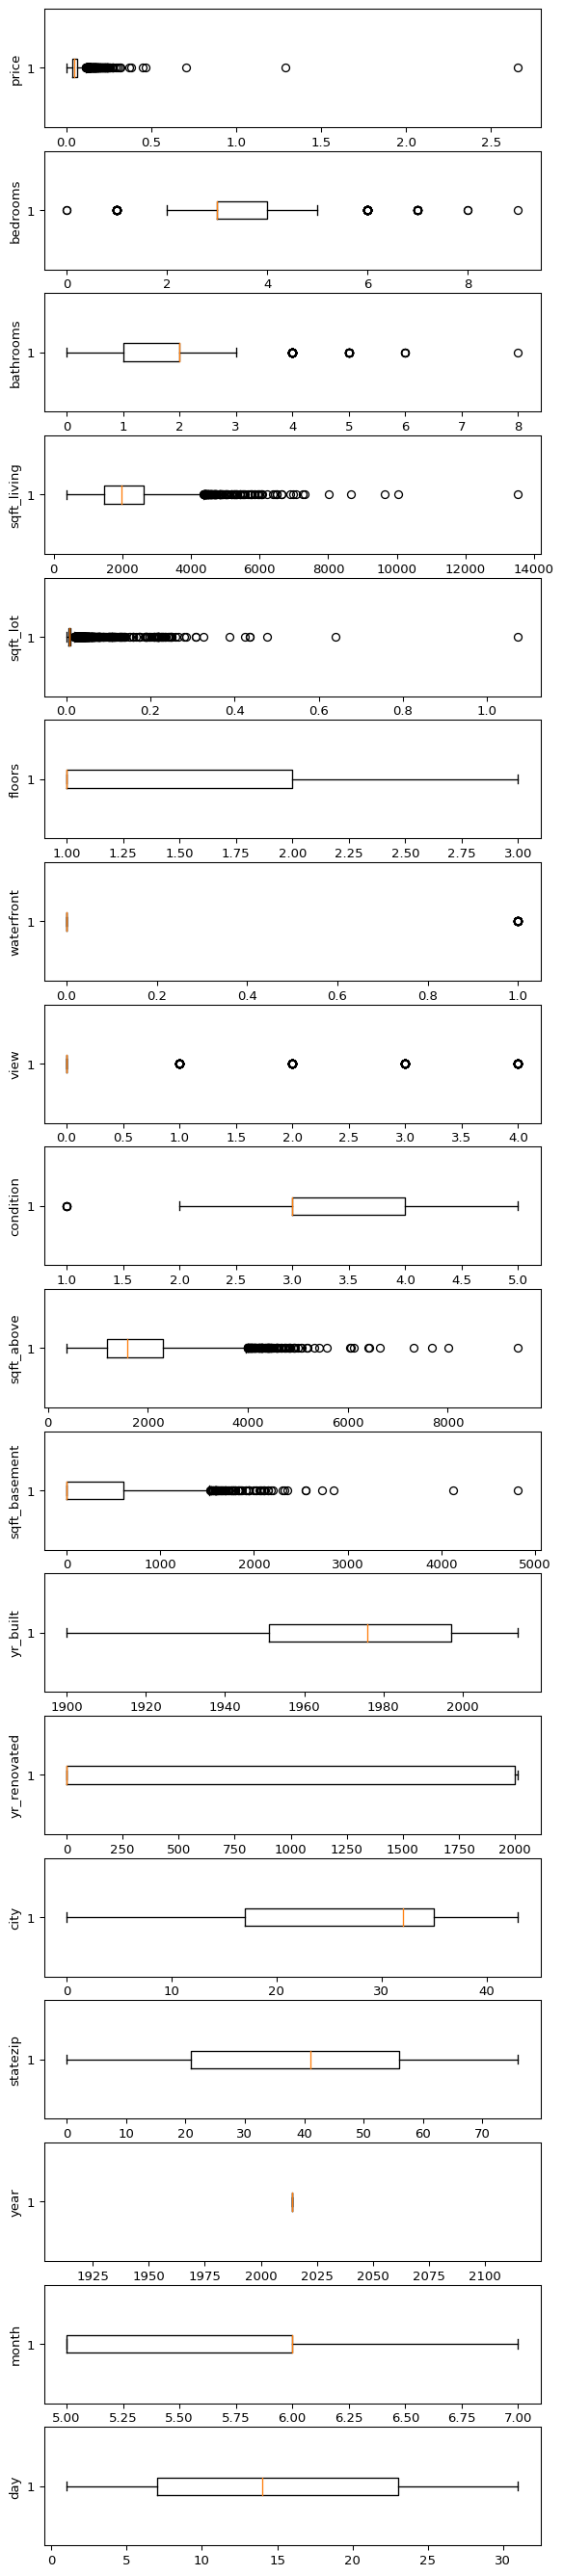

In [ ]:
num_columns = len(df.columns)
fig, axs = plt.subplots(num_columns,1,dpi=95, figsize=(7,num_columns*2))
i = 0
for col in df.columns:
  axs[i].boxplot(df[col].values, vert=False)
  axs[i].set_ylabel(col)
  i+=1
plt.show()


**Bedrooms, Bathrooms, Sqft_living, Sqft_lot, Sqft_above, Sqft_basement:**

These features have outlier percentages ranging from 1.78% to 11.76%, indicating potential extreme values in property characteristics.

**Waterfront, View, Condition:**

 These categorical features have outlier percentages up to 10%, which suggests unusual distributions in categorical values.
Year, Month, Day: These date-related features show no outliers, which is expected as they likely have discrete, bounded values.

In [ ]:
df_char=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
for i in df_char.columns:
  print(i , df_char[i].unique())
  print("___________________________________________________________________")

bedrooms [3 5 4 2 6 7 9 1 8 0]
___________________________________________________________________
bathrooms [1 2 3 8 4 5 6 0]
___________________________________________________________________
sqft_living [ 1340  3650  1930  2000  1940   880  1350  2710  2430  1520  1710  2920
  2330  1090  2910  1200  1570  3110  1370  1180  2240  1450  1750  2730
  1600  2090  2360  2200  2820  2600  1560  2860  1820  3630  3240   800
  1850  1960  2390  1580  1480   850  1770  1210  1160  1970  1270  3310
  1800  2210  1920  2190  3660  1320  1630  2680  2540   900  1650  1010
  2530  2850  2280  1900  1330  2170  2120  2490  1990  3690  2340  2110
  1140  1410  3180  2160  2350  2740  1680  3090  4010  2010  2370  1840
  2070  4340   840  1240  1390  2310  1050  2550  1120  2230   810  3190
  1670 13540  1880  1550  2050  2220  2300  1790  2440  3400  4420  1571
  1620  1408  3040  4490  1590  2450  1440  1100  2150  1490  1030   720
  2020  1300  3370  1890  1260  3470  2290  2810  1640  1500  2

In [ ]:
df_outliers=df[['waterfront', 'view', 'condition']]
for i in df_outliers.columns:
  print(i , df_outliers[i].unique())
  print("___________________________________________________________________")

waterfront [0 1]
___________________________________________________________________
view [0 4 1 2 3]
___________________________________________________________________
condition [3 5 4 2 1]
___________________________________________________________________


In [ ]:
def replace_outliers_inplace(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers inplace
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

# Replace outliers in all columns inplace
replace_outliers_inplace(df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,year,month,day
0,3.130000e+05,3.0,1.0,1340.0,7912.0,1,0.0,0.0,3.0,1340.0,0.0,1955,2005,36,62,2014,5,2
1,1.153094e+06,5.0,2.0,3650.0,9050.0,2,0.0,0.0,5.0,3370.0,280.0,1921,0,35,58,2014,5,2
2,3.420000e+05,3.0,2.0,1930.0,11947.0,1,0.0,0.0,4.0,1930.0,0.0,1966,0,18,26,2014,5,2
3,4.200000e+05,3.0,2.0,2000.0,8030.0,1,0.0,0.0,4.0,1000.0,1000.0,1963,0,3,7,2014,5,2
4,5.500000e+05,4.0,2.0,1940.0,10500.0,1,0.0,0.0,4.0,1140.0,800.0,1976,1992,31,31,2014,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.0,1510.0,6360.0,1,0.0,0.0,4.0,1510.0,0.0,1954,1979,35,62,2014,7,9
4596,5.343333e+05,3.0,2.0,1460.0,7573.0,2,0.0,0.0,3.0,1460.0,0.0,1983,2009,3,6,2014,7,9
4597,4.169042e+05,3.0,2.0,3010.0,7014.0,2,0.0,0.0,3.0,3010.0,0.0,2009,0,32,37,2014,7,9
4598,2.034000e+05,4.0,2.0,2090.0,6630.0,1,0.0,0.0,3.0,1070.0,1020.0,1974,0,35,71,2014,7,10


##**Skewness**

In [ ]:
df.skew()

price            0.834454
bedrooms         0.213033
bathrooms        0.392734
sqft_living      0.726154
sqft_lot         0.869082
floors           0.665686
waterfront       0.000000
view             0.000000
condition        0.996228
sqft_above       0.923452
sqft_basement    1.179035
yr_built        -0.502155
yr_renovated     0.385919
city            -0.761791
statezip        -0.146474
year             0.000000
month            0.349944
day              0.107131
dtype: float64

**The skewness values are in range -0.5 and 0.5
values>0.5 -> positive skewness
values<-0.5 -> negative skewness**

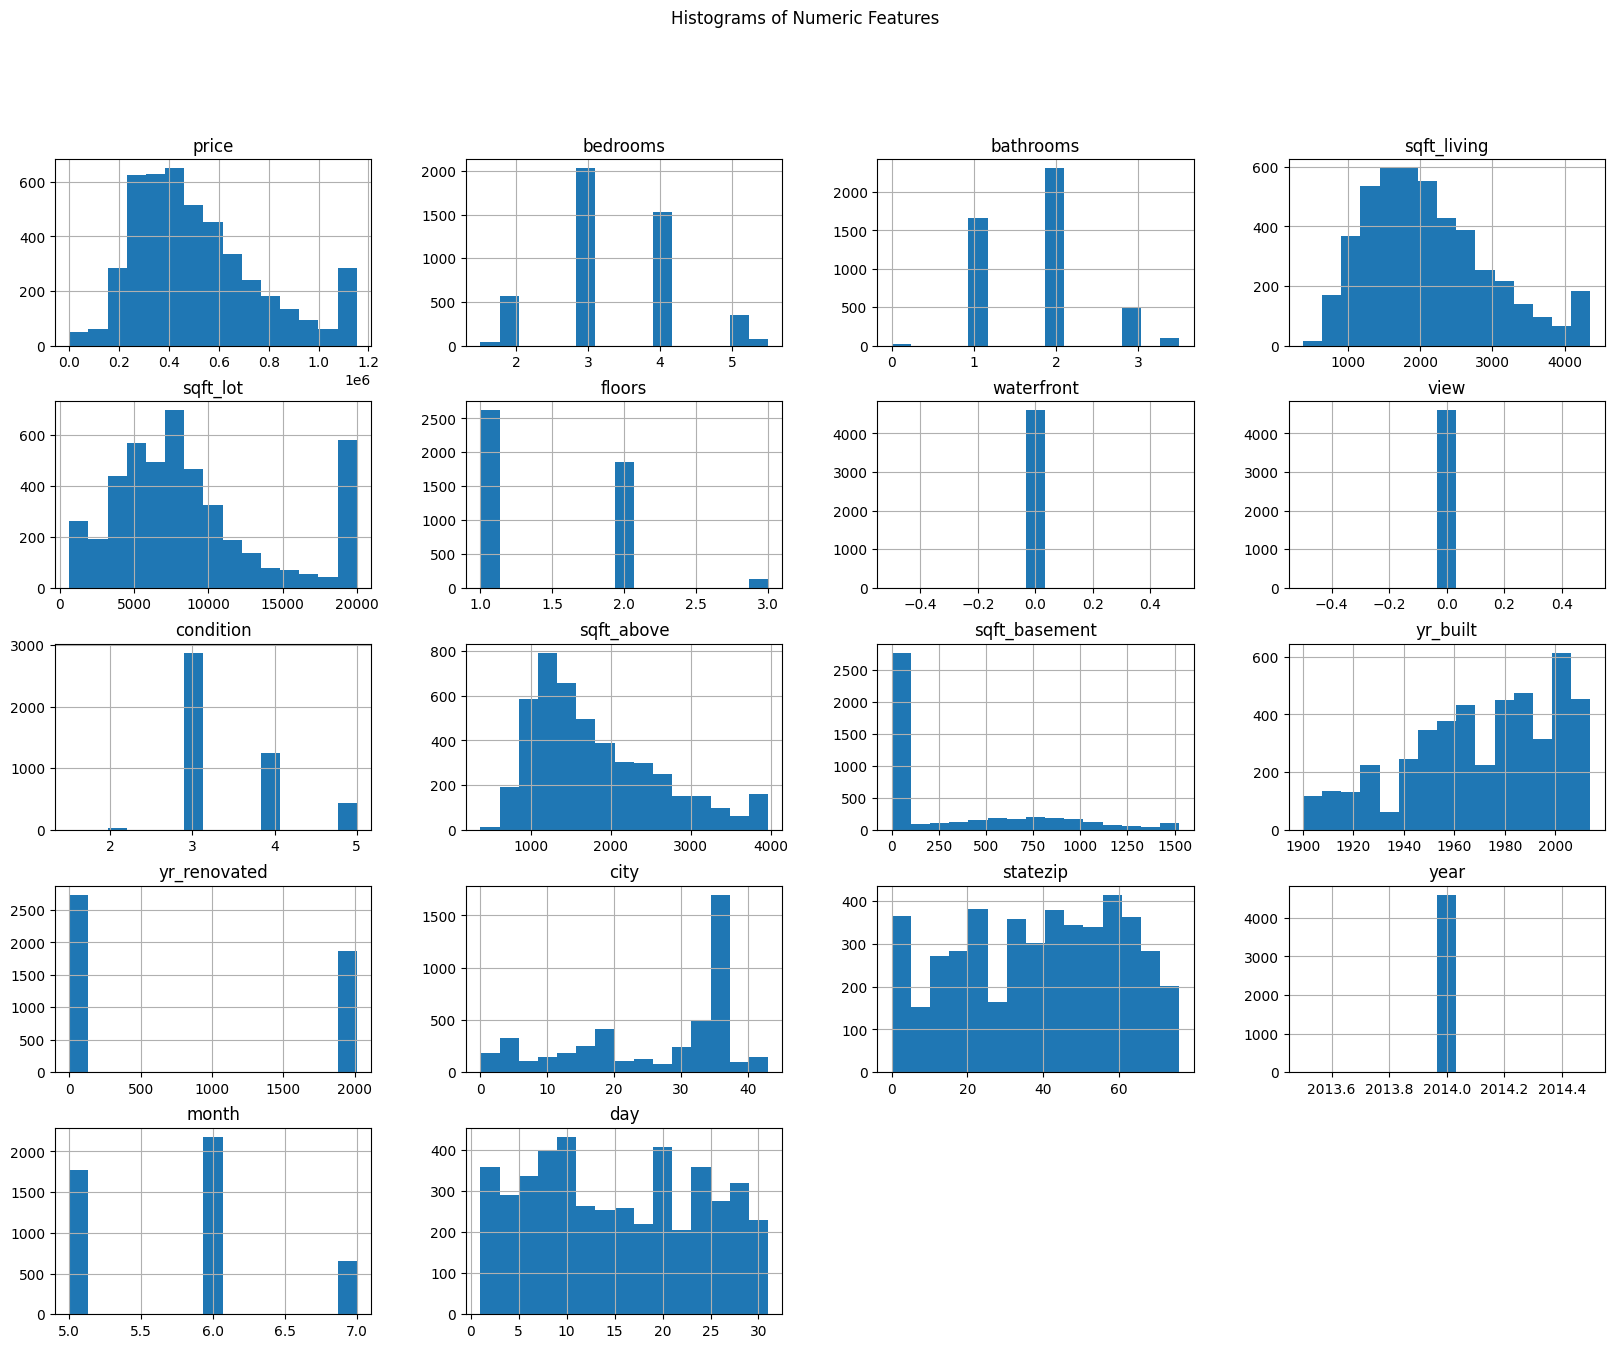

In [ ]:
# Plot histograms for numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_features].hist(bins=15, figsize=(20, 15), layout=(5, 4))
plt.suptitle('Histograms of Numeric Features')
plt.show()


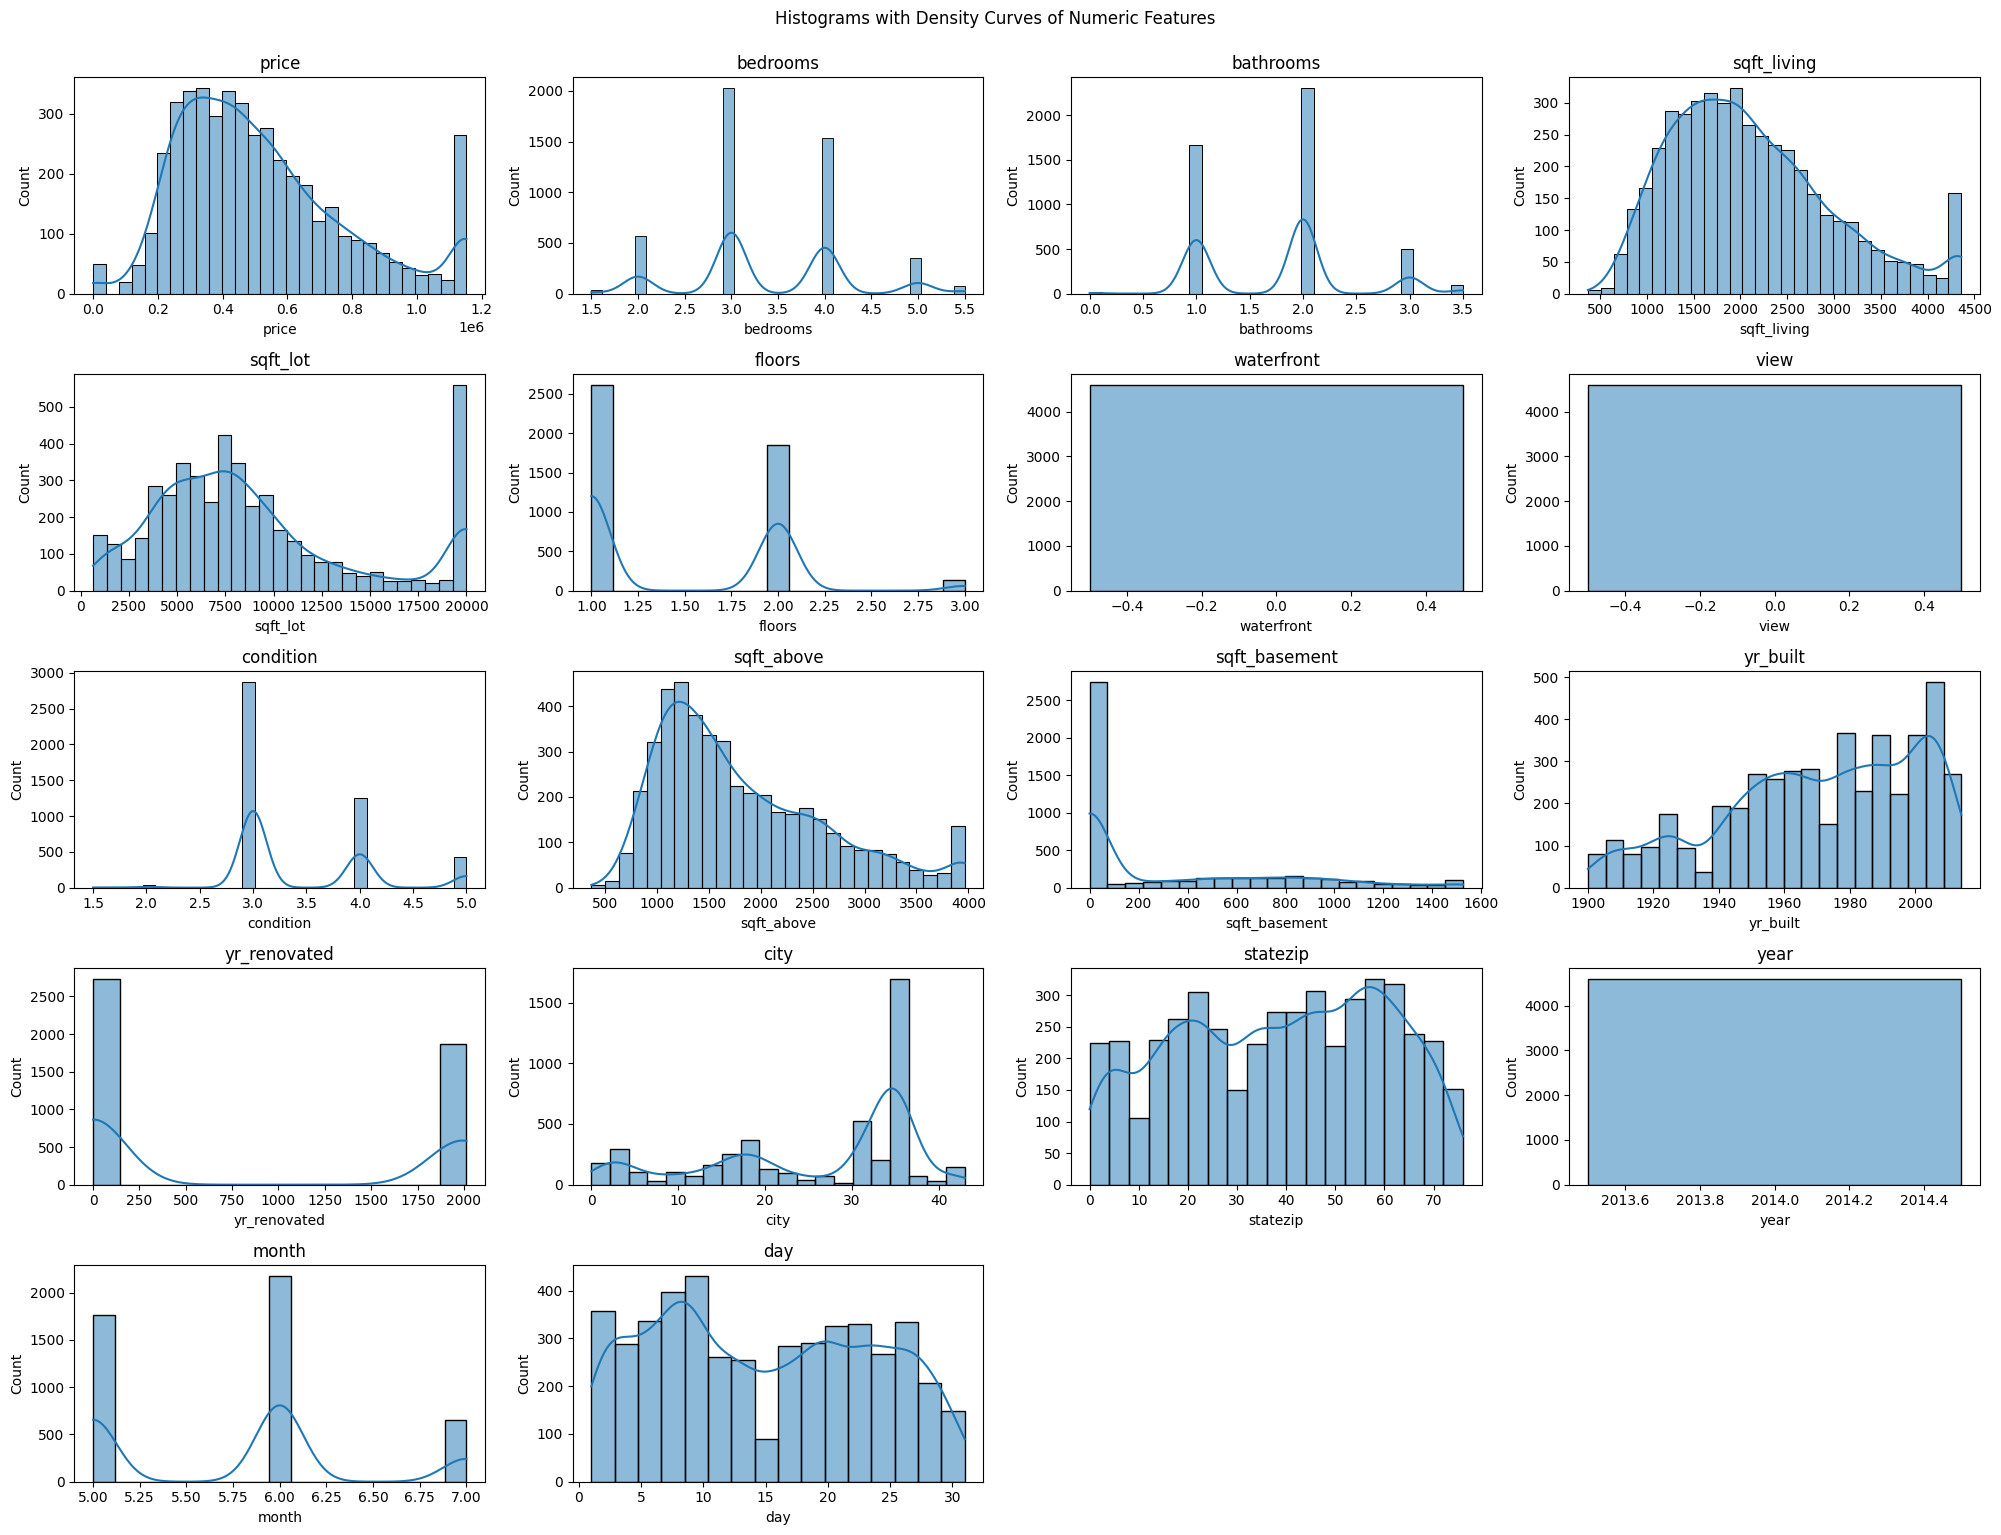

In [ ]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.suptitle('Histograms with Density Curves of Numeric Features', y=1.02)
plt.show()

**okay dealing with skewness :**

* **1-log transform**

    Effective for reducing right-skewed data.

    When to use: When the data contains positive values only.

* **2-sqrt transform**

    Reduces right skewness but to a lesser degree than log transformation.

    When to use: When the data contains non-negative values.


* **3-Cube Root Transformation**

    Can handle both positive and negative values and reduces skewness.

    When to use: When the data has negative values and right skewness.

* **4-Box-Cox Transformation**

    Can transform non-normal dependent variables to a normal shape.

    When to use: When the data is positive and you want a more powerful transformation.

* **5-Yeo-Johnson Transformation**

    Similar to Box-Cox but can handle zero and negative values.

    When to use: When the data contains zero or negative values.

* **6-Reciprocal Transformation**

    Reduces right skewness by taking the reciprocal of the data.

    When to use: When the data is strictly positive.

* **7-Removing Outliers**

    Outliers can heavily skew the data.
    
    When to use: When there are identifiable outliers affecting the skewness.

**okay then our data doesnot contain negative values and it contains zero values.
so we can use sqrt ,Cube Root , Yeo-Johnson**

In [ ]:
columns_to_transform = ['floors','sqft_living', 'sqft_lot',  'sqft_above','city', 'condition', 'sqft_basement']


#
df[columns_to_transform] = df[columns_to_transform].apply(np.sqrt)

Text(0.5, 1.02, 'Histograms with Density Curves of Numeric Features')

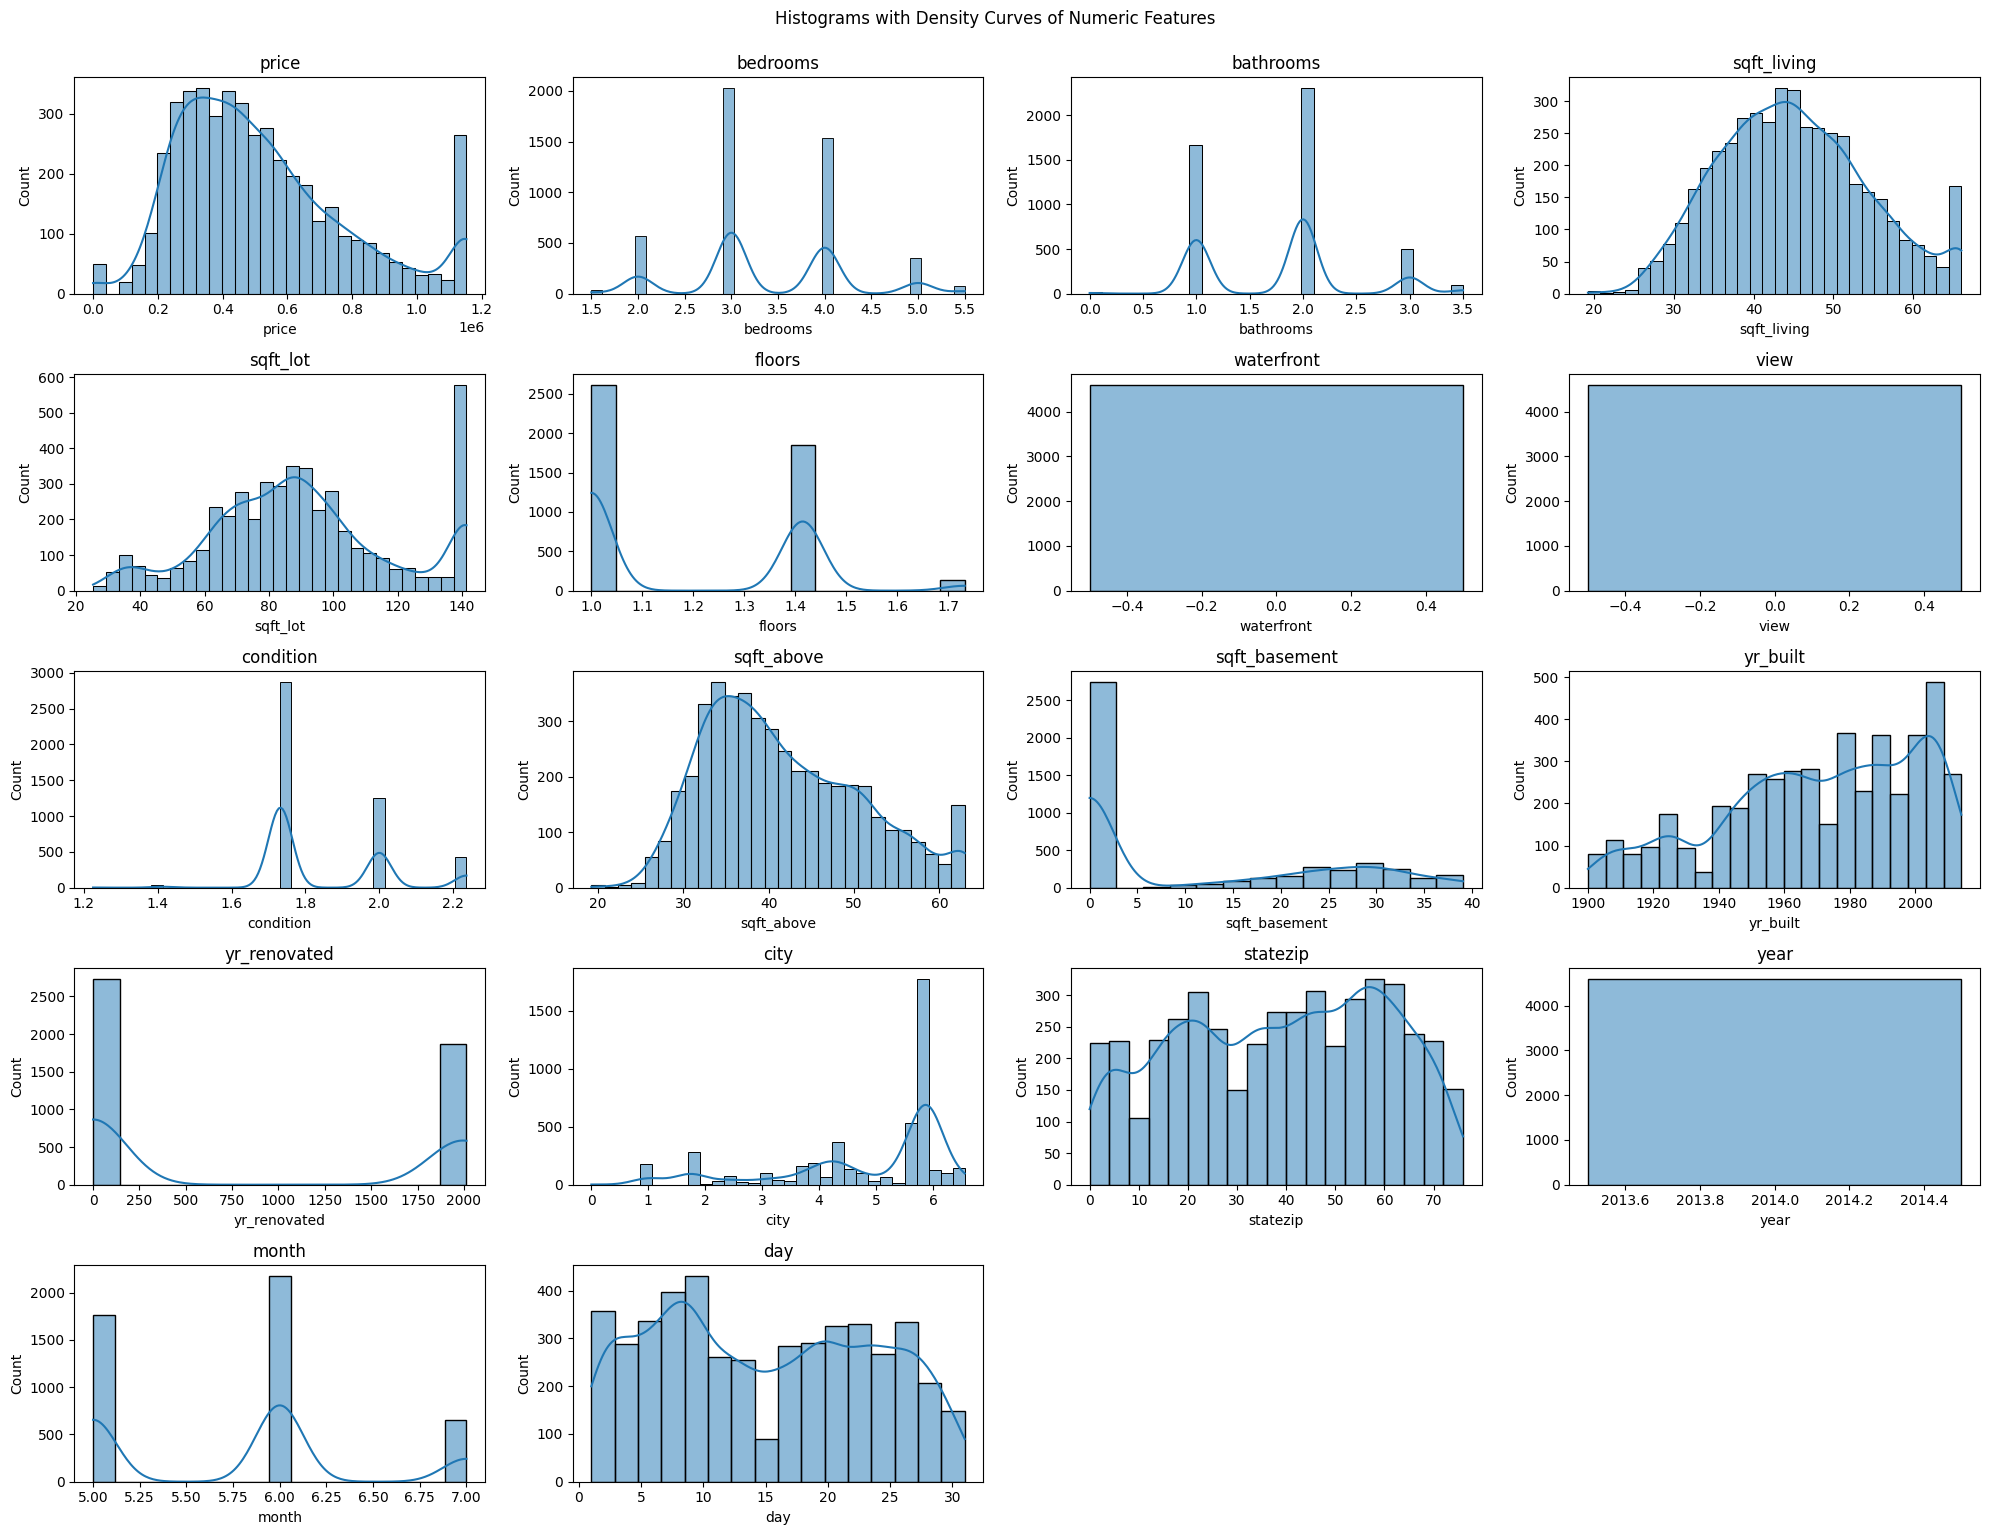

In [ ]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(df):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.suptitle('Histograms with Density Curves of Numeric Features', y=1.02)

In [ ]:
df.skew()

price            0.834454
bedrooms         0.213033
bathrooms        0.392734
sqft_living      0.278385
sqft_lot         0.246403
floors           0.506895
waterfront       0.000000
view             0.000000
condition        0.827840
sqft_above       0.541790
sqft_basement    0.683550
yr_built        -0.502155
yr_renovated     0.385919
city            -1.217034
statezip        -0.146474
year             0.000000
month            0.349944
day              0.107131
dtype: float64

##**Feature selection**

In [ ]:
# Features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature importances:")
print(importance_df)

# Select features with importance above a certain threshold (e.g., mean importance)
threshold = importance_df['Importance'].mean()
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature']

print("\nSelected features:")
print(selected_features)

# Create a new DataFrame with selected features
X_selected = X[selected_features]

print("\nDataFrame with selected features:")
print(X_selected)

Feature importances:
          Feature  Importance
2     sqft_living    0.478899
13       statezip    0.131654
12           city    0.092695
10       yr_built    0.075010
3        sqft_lot    0.056314
8      sqft_above    0.048209
16            day    0.030931
9   sqft_basement    0.017550
0        bedrooms    0.017293
11   yr_renovated    0.016967
1       bathrooms    0.010540
7       condition    0.010326
15          month    0.008048
4          floors    0.005565
6            view    0.000000
5      waterfront    0.000000
14           year    0.000000

Selected features:
2     sqft_living
13       statezip
12           city
10       yr_built
Name: Feature, dtype: object

DataFrame with selected features:
      sqft_living  statezip      city  yr_built
0       36.606010        62  6.000000      1955
1       60.415230        58  5.916080      1921
2       43.931765        26  4.242641      1966
3       44.721360         7  1.732051      1963
4       44.045431        31  5.567764      

In [ ]:

# Features to drop based on low importance
features_to_drop = [
    'year', 'waterfront', 'floors','month', 'view',
]

# Drop the less important features
df_reduced = df.drop(columns=features_to_drop)

print("DataFrame after dropping less important features:")
print(df_reduced.head())


DataFrame after dropping less important features:
        price  bedrooms  bathrooms  sqft_living    sqft_lot  condition  \
0   313000.00       3.0        1.0    36.606010   88.949424   1.732051   
1  1153093.75       5.0        2.0    60.415230   95.131488   2.236068   
2   342000.00       3.0        2.0    43.931765  109.302333   2.000000   
3   420000.00       3.0        2.0    44.721360   89.610267   2.000000   
4   550000.00       4.0        2.0    44.045431  102.469508   2.000000   

   sqft_above  sqft_basement  yr_built  yr_renovated      city  statezip  day  
0   36.606010       0.000000      1955          2005  6.000000        62    2  
1   58.051701      16.733201      1921             0  5.916080        58    2  
2   43.931765       0.000000      1966             0  4.242641        26    2  
3   31.622777      31.622777      1963             0  1.732051         7    2  
4   33.763886      28.284271      1976          1992  5.567764        31    2  


##**Splitting the data**

In [ ]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Scaling**

In [ ]:
#standard scaling
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)


In [ ]:
#minmax scaling
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)


#**Modeling**

##**Linear regression**

In [ ]:
# Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Training performance
y_train_pred_lr = linear_reg.predict(X_train_scaled)
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)


print(f"Linear Regression - Train MAE: {train_mae_lr}, Train MSE: {train_mse_lr}, Train R2: {train_r2_lr}")





Linear Regression - Train MAE: 134107.1691608027, Train MSE: 32546001008.227867, Train R2: 0.5225632175159871


##**random forest regression**

In [ ]:
# Random Forest Regression model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Training performance
y_train_pred_rf = rf_reg.predict(X_train_scaled)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)



print(f"Random Forest Regression - Train MAE: {train_mae_rf}, Train MSE: {train_mse_rf}, Train R2: {train_r2_rf}")



Random Forest Regression - Train MAE: 36547.567674047714, Train MSE: 3172353489.362268, Train R2: 0.9534628465573958


##**decision tree regression**

In [ ]:
dt_reg = DecisionTreeRegressor(max_depth=5,random_state=42)
dt_reg.fit(X_train_scaled, y_train)

y_train_pred_dt = dt_reg.predict(X_train_scaled)
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)



print(f"Decision Tree Regression - Train MAE: {train_mae_dt}, Train MSE: {train_mse_dt}, Train R2: {train_r2_dt}")


Decision Tree Regression - Train MAE: 126750.5117020547, Train MSE: 30012428048.6482, Train R2: 0.5597297167643713


##**gradient boosting regressor**

In [ ]:
# Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_scaled, y_train)

# Training performance
y_train_pred_gb = gb_reg.predict(X_train_scaled)
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
train_r2_gb = r2_score(y_train, y_train_pred_gb)


print(f"Gradient Boosting Regressor - Train MAE: {train_mae_gb}, Train MSE: {train_mse_gb}, Train R2: {train_r2_gb}")



Gradient Boosting Regressor - Train MAE: 91523.89338160594, Train MSE: 17657118948.198307, Train R2: 0.7409771462726222
